In [1]:
import pandas as pd
from pathlib import Path

# Définir les chemins
PROJECT_ROOT = Path("..").resolve()
DATA_OUTPUTS = PROJECT_ROOT / "data" / "outputs"

# Chargement des deux bases
df_profils = pd.read_csv(DATA_OUTPUTS / "df_profils.csv")
df_competences = pd.read_csv(DATA_OUTPUTS / "df_competences.csv")

# Fusion sur l'identifiant unique
df_analytique = pd.merge(df_profils, df_competences, on="enseignant_uid", how="inner")

# Export du fichier fusionné
df_analytique.to_csv(DATA_OUTPUTS / "df_analytique.csv", index=False)

# Aperçu rapide
print("✅ df_analytique fusionné avec", df_analytique.shape[0], "enseignants et", df_analytique.shape[1], "variables")
df_analytique.head()


✅ df_analytique fusionné avec 100 enseignants et 41 variables


,enseignant_uid,age,statut_administratif,etablissement,annees_experience_totale,nb_pays_enseignes,nb_etablissements_carriere,annees_enseignement_france,annees_enseignement_mlf,annees_enseignement_aefe,...,conception_evaluation_suivi_score,outil_numerique_benefices_score,outils_suivi_apprentissage_score,climat_classe_score,adaptation_pratiques_specifiques_score,lien_apprentissages_parcours_score,projets_collaboration_impact_score,implication_parents_suivi_score,integration_contexte_etablissement_score,score_global
0,E0001,38,contrat local,lycée français international le détroit tanger,16.0,1,6.0,0.0,6.0,0,...,2.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0,1.3
1,E0002,49,détachement,lycée français international andré malraux rabat,20.0,1,3.0,1.0,19.0,1,...,2.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,1.2
2,E0003,46,contrat local,lycée français international andré malraux rabat,22.0,2,4.0,20.0,20.0,0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,1.4
3,E0004,44,détachement,lycée français international louis-massignon c...,16.0,2,3.0,12.0,1.0,3,...,3.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,2.0
4,E0005,45,contrat local,école odette de puigaudeau dakhla,20.0,4,8.0,1.0,11.0,0,...,1.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0


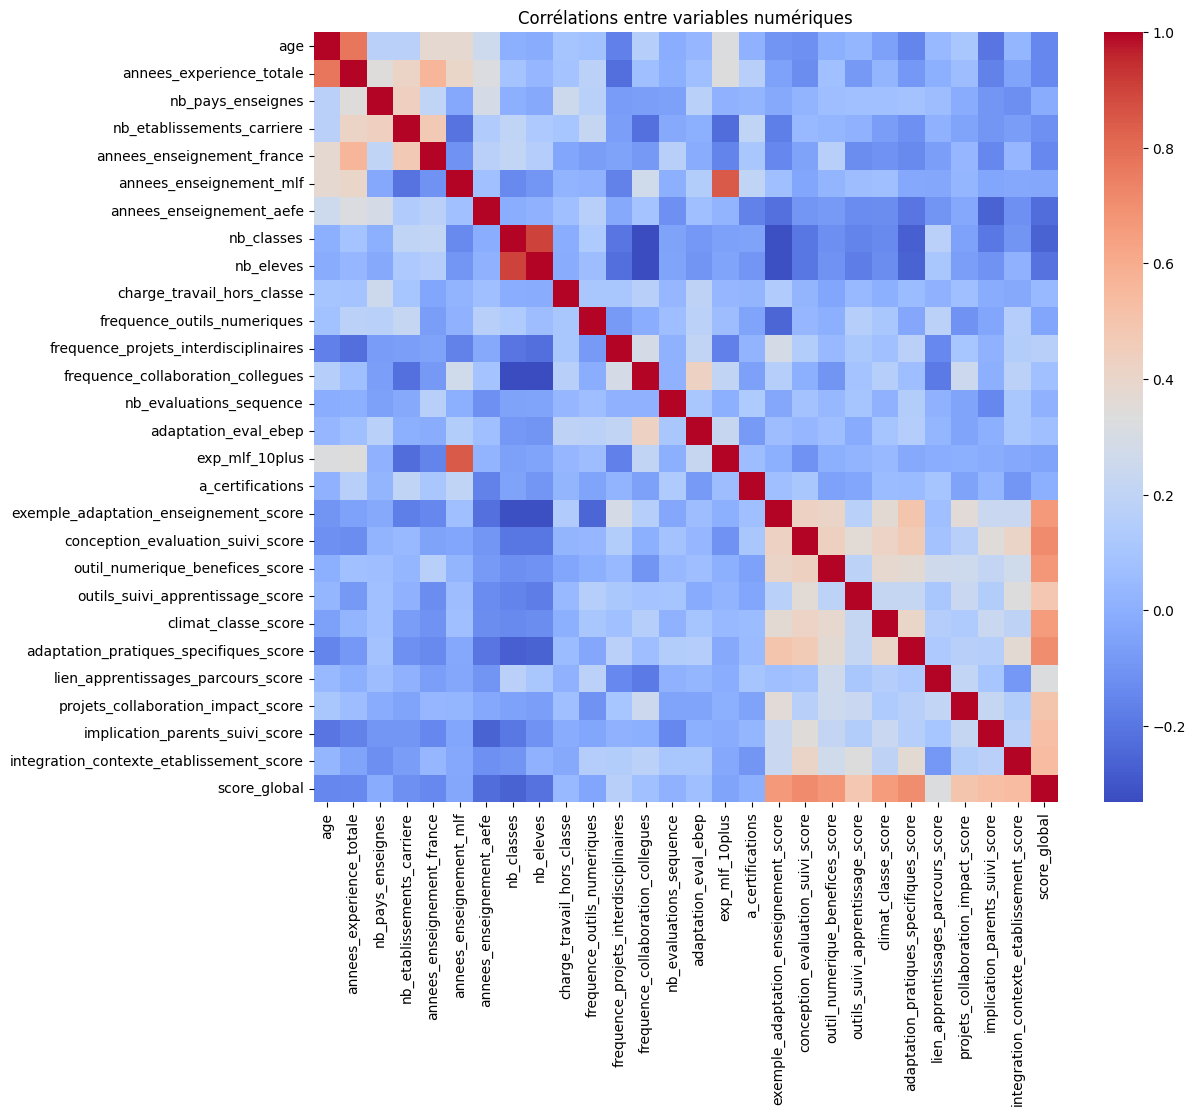

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df_analytique.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Corrélations entre variables numériques")
plt.show()
